In [2]:
def e_step (theta,y):
    keys = set()
    ez = {}
    for key, val in theta.iteritems():
        keys.add(key)
        ez[key] = []
    for r in range(len(y['t1'])):
        den = 0
        for i in keys:
            den += theta[i]*y[i][r]
        #print den
        for i in keys:
            ez[i].append(theta[i]*y[i][r]/den)
    return ez

In [3]:
def m_step(ez):
    ny = {}
    keys = set()
    for key, val in ez.iteritems():
        keys.add(key)
    for i in keys:
        ny[i]= sum(ez[i])/6
    return ny

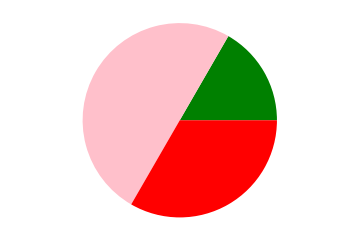

{'t2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.75], 't3': [0.0, 0.0, 0.6666666666666666, 1.0, 0.0, 0.0], 't1': [0.0, 1.0, 0.3333333333333333, 0.0, 1.0, 0.25]}
{'t2': 0.2916666666666667, 't3': 0.27777777777777773, 't1': 0.4305555555555555}


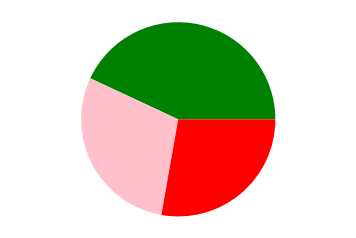

{'t2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.40384615384615385], 't3': [0.0, 0.0, 0.39215686274509803, 1.0, 0.0, 0.0], 't1': [0.0, 1.0, 0.607843137254902, 0.0, 1.0, 0.5961538461538461]}
{'t2': 0.23397435897435895, 't3': 0.23202614379084965, 't1': 0.5339994972347913}


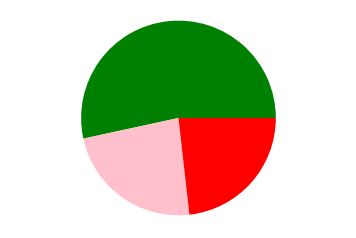

{'t2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.3046644844517185], 't3': [0.0, 0.0, 0.30289605381901713, 1.0, 0.0, 0.0], 't1': [0.0, 1.0, 0.6971039461809829, 0.0, 1.0, 0.6953355155482815]}
{'t2': 0.2174440807419531, 't3': 0.2171493423031695, 't1': 0.5654065769548774}


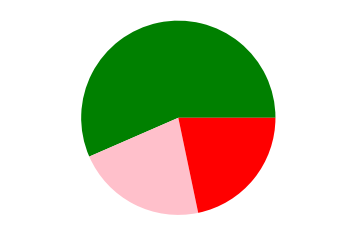

{'t2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.27775933839243355], 't3': [0.0, 0.0, 0.27748731682849204, 1.0, 0.0, 0.0], 't1': [0.0, 1.0, 0.722512683171508, 0.0, 1.0, 0.7222406616075665]}
{'t2': 0.21295988973207225, 't3': 0.2129145528047487, 't1': 0.5741255574631791}


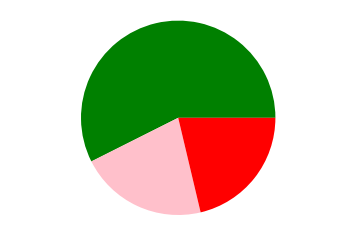

{'t2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.27056768803304215], 't3': [0.0, 0.0, 0.27052566956500773, 1.0, 0.0, 0.0], 't1': [0.0, 1.0, 0.7294743304349922, 0.0, 1.0, 0.7294323119669578]}
{'t2': 0.21176128133884034, 't3': 0.21175427826083462, 't1': 0.576484440400325}


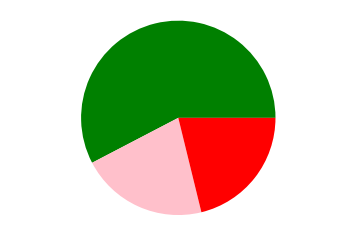

{'t2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.26864881787320793], 't3': [0.0, 0.0, 0.2686423202104355, 1.0, 0.0, 0.0], 't1': [0.0, 1.0, 0.7313576797895646, 0.0, 1.0, 0.7313511821267922]}
{'t2': 0.21144146964553467, 't3': 0.21144038670173926, 't1': 0.5771181436527262}


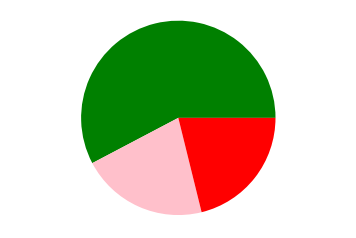

{'t2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.26813631598649995], 't3': [0.0, 0.0, 0.26813531090291365, 1.0, 0.0, 0.0], 't1': [0.0, 1.0, 0.7318646890970864, 0.0, 1.0, 0.7318636840135001]}
{'t2': 0.21135605266441668, 't3': 0.21135588515048562, 't1': 0.5772880621850978}


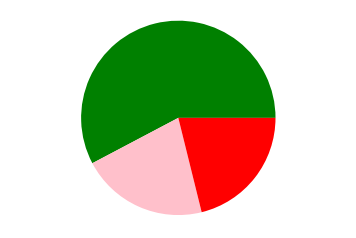

{'t2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.2679992770943922], 't3': [0.0, 0.0, 0.2679991216119098, 1.0, 0.0, 0.0], 't1': [0.0, 1.0, 0.7320008783880901, 0.0, 1.0, 0.7320007229056078]}
{'t2': 0.21133321284906537, 't3': 0.2113331869353183, 't1': 0.5773336002156163}


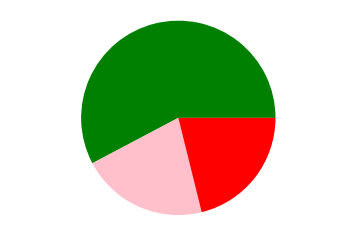

{'t2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.2679626039136163], 't3': [0.0, 0.0, 0.26796257986057864, 1.0, 0.0, 0.0], 't1': [0.0, 1.0, 0.7320374201394213, 0.0, 1.0, 0.7320373960863837]}
{'t2': 0.21132710065226937, 't3': 0.21132709664342977, 't1': 0.5773458027043008}


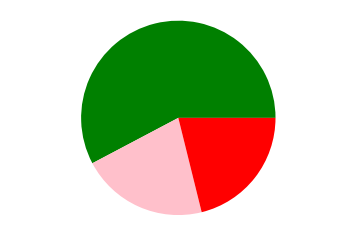

{'t2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.2679527846752019], 't3': [0.0, 0.0, 0.2679527809541918, 1.0, 0.0, 0.0], 't1': [0.0, 1.0, 0.7320472190458083, 0.0, 1.0, 0.7320472153247981]}
{'t2': 0.21132546411253364, 't3': 0.21132546349236528, 't1': 0.577349072395101}


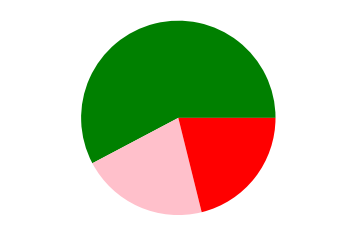

{'t2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.26795015476005285], 't3': [0.0, 0.0, 0.26795015418441087, 1.0, 0.0, 0.0], 't1': [0.0, 1.0, 0.7320498458155892, 0.0, 1.0, 0.7320498452399472]}
{'t2': 0.21132502579334214, 't3': 0.21132502569740183, 't1': 0.577349948509256}


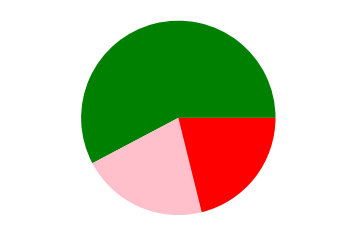

{'t2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.2679494502538395], 't3': [0.0, 0.0, 0.26794945016478733, 1.0, 0.0, 0.0], 't1': [0.0, 1.0, 0.7320505498352126, 0.0, 1.0, 0.7320505497461606]}
{'t2': 0.2113249083756399, 't3': 0.2113249083607979, 't1': 0.5773501832635622}


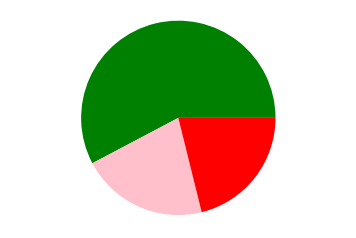

{'t2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.2679492615094727], 't3': [0.0, 0.0, 0.2679492614956963, 1.0, 0.0, 0.0], 't1': [0.0, 1.0, 0.7320507385043038, 0.0, 1.0, 0.7320507384905274]}
{'t2': 0.21132487691824545, 't3': 0.2113248769159494, 't1': 0.5773502461658052}


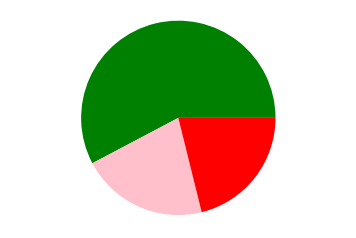

{'t2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.267949210939831], 't3': [0.0, 0.0, 0.2679492109376998, 1.0, 0.0, 0.0], 't1': [0.0, 1.0, 0.7320507890623003, 0.0, 1.0, 0.7320507890601691]}
{'t2': 0.2113248684899718, 't3': 0.21132486848961662, 't1': 0.5773502630204116}


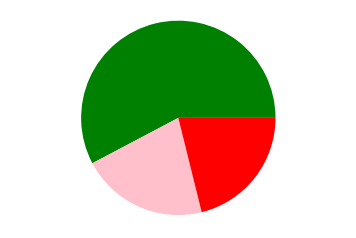

{'t2': [1.0, 0.0, 0.0, 0.0, 0.0, 0.26794919739039547], 't3': [0.0, 0.0, 0.2679491973900658, 1.0, 0.0, 0.0], 't1': [0.0, 1.0, 0.7320508026099343, 0.0, 1.0, 0.7320508026096045]}
{'t2': 0.21132486623173255, 't3': 0.21132486623167765, 't1': 0.5773502675365898}
3.46410160522
1.26794919739
1.26794919739


In [4]:
from __future__ import division
from math import sqrt
from matplotlib import pyplot as plt

y = {'t1':[0,1,1,0,1,1],'t2':[1,0,0,0,0,1],'t3':[0,0,1,1,0,0]}
cth = {'t1':1/6,'t2':3/6,'t3':1/3}
for round in range (15):
    cth_nr = [cth['t1'],cth['t2'],cth['t3']]
    colors = ['green','pink','red']
    plt.pie(cth_nr,colors=colors)
    plt.axis('equal')
    plt.show()
    expz = e_step(cth,y)
    print expz
    cth = m_step(expz)

    print cth

for i in ['t1','t2','t3']:
    print cth [i]*6